# Social data analysis: Wikipedia articles
## Author: Ainur Baikara
### Subject: Social Computing

In [115]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
col_names = ("Article","Quality", "rev_id", "page_id", "user", "timestamp")
articles = pd.read_csv("articles.csv")
data_sc = pd.read_csv("DataData.csv", names = col_names)
data_talk = pd.read_csv("TalkData.csv", names = col_names)

In [117]:
data_sc.count()

Article      704289
Quality      704284
rev_id       704284
page_id      704284
user         704264
timestamp    704284
dtype: int64

In [114]:
data_talk.count()

Article      100816
Quality      100812
rev_id       100812
page_id      100812
user         100803
timestamp    100812
dtype: int64

## here are some preprocessing I have made to before analysing the data 

In [119]:
data_sc.head()

,Article,Quality,rev_id,page_id,user,timestamp
0,Parallel_computing,FA,866078418.0,145162.0,The Transhumanist,2018-10-28T03:13:28Z
1,Parallel_computing,FA,863397642.0,145162.0,Dijonkitchen,2018-10-10T14:50:14Z
2,Parallel_computing,FA,863196345.0,145162.0,ClueBot NG,2018-10-09T09:02:23Z
3,Parallel_computing,FA,863196339.0,145162.0,49.147.207.78,2018-10-09T09:02:16Z
4,Parallel_computing,FA,858091786.0,145162.0,InternetArchiveBot,2018-09-05T00:38:29Z


In [118]:
data_sc.describe()

,rev_id,page_id
count,7.042840e+05,7.042840e+05
mean,3.639388e+08,6.002302e+06
std,2.516063e+08,1.127496e+07
min,4.310000e+02,5.860000e+02
25%,1.365495e+08,1.492100e+04
50%,3.405169e+08,1.425280e+05
75%,5.762951e+08,4.857797e+06
max,8.691540e+08,5.749064e+07


In [120]:
data_talk.count()

Article      100816
Quality      100812
rev_id       100812
page_id      100812
user         100803
timestamp    100812
dtype: int64

In [121]:
data_talk.describe()

,rev_id,page_id
count,1.008120e+05,1.008120e+05
mean,3.574700e+08,8.252122e+06
std,2.383747e+08,1.129529e+07
min,5.123000e+03,1.243000e+03
25%,1.523893e+08,2.568920e+05
50%,3.385869e+08,1.289216e+06
75%,5.419292e+08,1.572113e+07
max,8.703699e+08,5.749189e+07


In [22]:
def f(row):
    if row['Quality'] == 'A':
        val = 'Good'
    elif row['Quality'] == 'GA':
        val = 'Good'
    elif row['Quality'] == 'FA':
        val = 'Good'
    else:
        val = 'NotSoGood'
    return val

In [23]:
data_sc['article_type'] = data_sc.apply(f, axis=1)
data_talk['article_type'] = data_talk.apply(f, axis=1)

In [79]:
data_sc.head()

,Article,Quality,rev_id,page_id,user,timestamp
0,Parallel_computing,FA,866078418.0,145162.0,The Transhumanist,2018-10-28T03:13:28Z
1,Parallel_computing,FA,863397642.0,145162.0,Dijonkitchen,2018-10-10T14:50:14Z
2,Parallel_computing,FA,863196345.0,145162.0,ClueBot NG,2018-10-09T09:02:23Z
3,Parallel_computing,FA,863196339.0,145162.0,49.147.207.78,2018-10-09T09:02:16Z
4,Parallel_computing,FA,858091786.0,145162.0,InternetArchiveBot,2018-09-05T00:38:29Z


In [78]:
data_talk.head()

,Article,Quality,rev_id,page_id,user,timestamp
0,Parallel_computing,FA,866387482.0,1324798.0,Evolution and evolvability,2018-10-30T01:13:57Z
1,Parallel_computing,FA,809249532.0,1324798.0,InternetArchiveBot,2017-11-07T23:49:01Z
2,Parallel_computing,FA,804296631.0,1324798.0,Lowercase sigmabot III,2017-10-08T01:33:13Z
3,Parallel_computing,FA,804185096.0,1324798.0,InternetArchiveBot,2017-10-07T09:34:50Z
4,Parallel_computing,FA,802202978.0,1324798.0,InternetArchiveBot,2017-09-24T17:20:07Z


## So here I have got four different dataframes so that I could easily done the analysis:
* sc_good: from the article dataset contains just Good articles 
* sc_bad: from the article dataset contains just NSG articles (I don't know why I haven't got the Articles with the Start category, so bascially in this dataset only one category)
* talk_good: from the talk dataset, contains only talks for Good articles 
* talk_bad: from the talk dataset, contains only talks for NSG article (the same as previously mentioned, consists only one category which is Start)

In [26]:
sc_good = data_sc[data_sc.article_type == 'Good']
sc_bad = data_sc[data_sc.article_type == 'NotSoGood']
talk_good = data_talk[data_talk.article_type == 'Good']
talk_bad = data_talk[data_talk.article_type == 'NotSoGood']

# Task 1: Total number of unique editors
## My Hypothesis: 
* Total number of editors (mean value) would be higer for Good article, while total number of editors would be less (mean) for NSG articles. 
* I am making this hypothesis because I believe that the more (unique) users collaborate in the article the better the quality

First, run the aggragation query to get the count of unique users and group them by Article name. I had to call the reset_index so that those two features can be callable
Next, to this task dataframe I have merged the Quality feature from the main dataset. I needed this for the boxplot, so that I could show the article categories
Finally, merging function gave me a lot of duplicates, so I had to drop those rows. And voila I have the result. 
This was not easy to come up with the following lines of code:) 

In [122]:
task1_good = sc_good.groupby(["Article"])["user"].nunique().reset_index(name="count")
task1_good = pd.merge(task1_good, sc_good[['Article', 'Quality']], on='Article')
task1_good.drop_duplicates()

,Article,count,Quality
0,4chan,2547,FA
6557,AACS_encryption_key_controversy,369,GA
7503,AVG_PC_TuneUp,139,GA
7865,Acid2,639,FA
9236,Alan_Kotok,118,GA
10285,Alan_Turing,3367,GA
17545,Allocator_(C++),53,GA
17673,Anonymous_(group),1466,A
21374,Apple_Inc._litigation,290,GA
22444,Apple_TV,1265,GA


In [123]:
task1_bad = sc_bad.groupby(["Article"])["user"].nunique().reset_index(name="count")
task1_bad = pd.merge(task1_bad, sc_bad[['Article', 'Quality']], on='Article')
task1_bad.drop_duplicates()

,Article,count,Quality
0,2016_Dyn_cyberattack,150,C
377,3dfx_Interactive,508,C
1256,64-bit_computing,986,C
3180,ACM_SIGHPC,8,C
3216,ACM_SIGOPS,8,C
3229,ARM_big.LITTLE,111,C
3509,ARPANET,1140,C
5552,ASCII,1696,C
9089,Aakash_(tablet),589,C
10543,Ada_(programming_language),654,C


So, now let's  compare the description table of two different articles. The results is somehow go againt my hypothesis. I thought, good Articles would have higher mean value as more collaborative would make the article have better quality. According to those description tables those datasets are close to each other which basically mean that the same (almost) number of unique editors for those articles categories (Good, NSGood). Although, I must take into account the apparent difference in the size of the observations. NSG articles are doubled the size of observations for the Good Articles 

In [124]:
task1_good.describe()

,count
count,235128.000000
mean,1949.405962
std,1555.671598
min,13.000000
25%,653.000000
50%,1670.000000
75%,2944.000000
max,5823.000000


In [125]:
task1_bad.describe()

,count
count,469147.000000
mean,2129.235598
std,1382.870392
min,8.000000
25%,887.000000
50%,1791.000000
75%,3196.000000
max,5414.000000


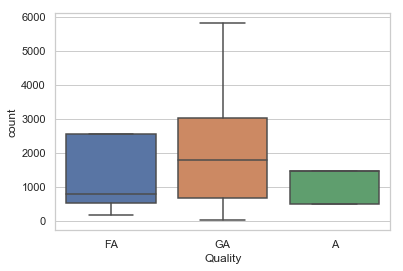

In [126]:
sb.boxplot( y='count', x='Quality', data=task1_good)

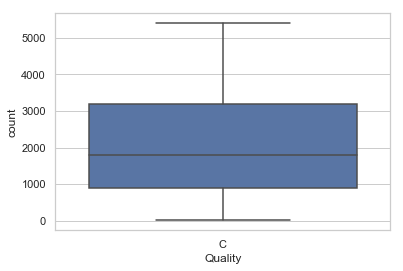

In [127]:
sb.boxplot( y='count', x='Quality', data=task1_bad)

# Discussion: 
* it is inteersting that the C level articles and GA level articles have similar distribution
* a lot of "extreme" values for GA level and C lever articles 
* I was looking why we have similar results for those article categories. GA articles have a lot of low-medium level articles which is somehow similar to the C level articles. 
* another observation: a lot of outliers are located from quird quartile to the max for both C level and GA level articles 

# Task 2: Number of edits per editors
## My Hypothesis: 
* the more the number of edits the better the quality of the article. Because if the user wants to improve his/her contribution why will probably come back and edit the page again or they might want fix their mistakes
* good articles tend to have more edits as there are a lot  of people who care about the certain article 

In [128]:
sc_good.head()

,Article,Quality,rev_id,page_id,user,timestamp,article_type
0,Parallel_computing,FA,866078418.0,145162.0,The Transhumanist,2018-10-28T03:13:28Z,Good
1,Parallel_computing,FA,863397642.0,145162.0,Dijonkitchen,2018-10-10T14:50:14Z,Good
2,Parallel_computing,FA,863196345.0,145162.0,ClueBot NG,2018-10-09T09:02:23Z,Good
3,Parallel_computing,FA,863196339.0,145162.0,49.147.207.78,2018-10-09T09:02:16Z,Good
4,Parallel_computing,FA,858091786.0,145162.0,InternetArchiveBot,2018-09-05T00:38:29Z,Good


In [35]:
task2_good = sc_good.groupby(["Article","user"])["rev_id"].nunique().reset_index(name="count")
task2_good = pd.merge(task2_good, sc_good[['Article', 'Quality']], on='Article')
task2_good.drop_duplicates()

,Article,user,count,Quality
0,4chan,.MAD Com,1,FA
6557,4chan,09I500,9,FA
13114,4chan,0reteki,10,FA
19671,4chan,0xF8E8,1,FA
26228,4chan,10max01,2,FA
32785,4chan,12.182.43.102,1,FA
39342,4chan,12.203.35.244,6,FA
45899,4chan,12.207.100.129,1,FA
52456,4chan,1234r00t,1,FA
59013,4chan,124.106.183.19,3,FA


In [36]:
task2_good.describe()

,count
count,4.583599e+08
mean,2.348245e+00
std,1.080398e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.326000e+03


In [42]:
task2_bad = sc_bad.groupby(["Article","user"])["rev_id"].nunique().reset_index(name="count")
task2_bad.describe()

,count
count,239088.000000
mean,1.962236
std,6.304487
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1056.000000


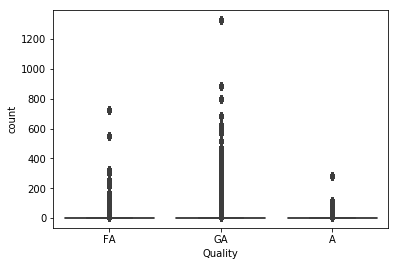

In [43]:
# f, axes = plt.subplots(1, 2)
# sb.set(style="whitegrid")
# sb.boxplot( x=data=task2_good,   ax=axes[0])
# sb.boxplot( data=task2_bad,  ax=axes[1])
sb.boxplot( y='count', x='Quality', data=task2_good)

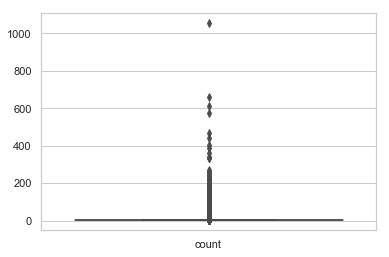

In [129]:
sb.boxplot(data=task2_bad)

# Discussion: 
* Something similir to the first part of the social data analysis project
* GA and C level articles  have similar distribution of the values. And outliers are similar. Some of the "extreme" outliers could be the wiki-bots which can be seen from the boxplots above. 
* If we just consider A and FA level articles as the articles which have really good quality it somehow support my hypothesis which the more the number of edits per editor the better the quality. 

PS: my Kernel went down couple of times for this part as I was performing the merging; just after crushing many times I realized that it was a bad idea to assign another column for the task2_bad dataframe

# Task 3: Number of talk-page posts
## My Hypothesis: 
* I expect, Good articles to have more number of talk-page posts as the article with good  quality could be the "hot discussion" area. 

In [130]:
talk_bad.head()

,Article,Quality,rev_id,page_id,user,timestamp,article_type
48686,ACM_SIGHPC,C,800978935.0,55262469.0,Cypherquest,2017-09-16T22:46:14Z,NotSoGood
48687,ACM_SIGOPS,C,800979043.0,55262475.0,Cypherquest,2017-09-16T22:47:05Z,NotSoGood
48688,Alan_Kay,C,813063918.0,768870.0,InternetArchiveBot,2017-12-01T15:03:10Z,NotSoGood
48689,Alan_Kay,C,787521652.0,768870.0,EddieHugh,2017-06-25T21:42:46Z,NotSoGood
48690,Alan_Kay,C,787128462.0,768870.0,Tpbradbury,2017-06-23T16:14:47Z,NotSoGood


In [131]:
task3_good = talk_good.groupby(["Article"])["rev_id"].nunique().reset_index(name="count")
task3_good = pd.merge(task3_good, talk_good[['Article', 'Quality']], on='Article')
task3_good.drop_duplicates()

,Article,count,Quality
0,4chan,4615,FA
4615,AACS_encryption_key_controversy,1041,GA
5656,AVG_PC_TuneUp,67,GA
5723,Acid2,374,FA
6097,Alan_Kotok,66,GA
6163,Alan_Turing,1098,GA
7261,Allocator_(C++),19,GA
7280,Anonymous_(group),2918,A
10198,Apple_Inc._litigation,111,GA
10309,Apple_TV,392,GA


In [132]:
task3_good.describe()

,count
count,48686.000000
mean,1913.528694
std,1785.895472
min,6.000000
25%,374.000000
50%,1058.000000
75%,2918.000000
max,5262.000000


In [133]:
task3_bad = talk_bad.groupby(["Article"])["rev_id"].nunique().reset_index(name="count")
task3_bad = pd.merge(task3_bad, talk_bad[['Article', 'Quality']], on='Article')
task3_bad.drop_duplicates()

,Article,count,Quality
0,2016_Dyn_cyberattack,30,C
30,3dfx_Interactive,171,C
201,64-bit_computing,285,C
486,ACM_SIGHPC,1,C
487,ACM_SIGOPS,1,C
488,ARM_big.LITTLE,133,C
621,ARPANET,214,C
835,ASCII,436,C
1271,Aakash_(tablet),107,C
1378,Ada_(programming_language),181,C


In [134]:
task3_good.describe()

,count
count,48686.000000
mean,1913.528694
std,1785.895472
min,6.000000
25%,374.000000
50%,1058.000000
75%,2918.000000
max,5262.000000


In [135]:
task3_bad.describe()

,count
count,52130.000000
mean,812.628429
std,977.624459
min,0.000000
25%,185.000000
50%,436.000000
75%,934.000000
max,3787.000000


Those description tables prove my hypothesis that the more number of talk-page posts the better the quality. If we look at the mean for talk-page post for good articles is 2.5 times larger than the mean for talk-page posts for NSG articles 

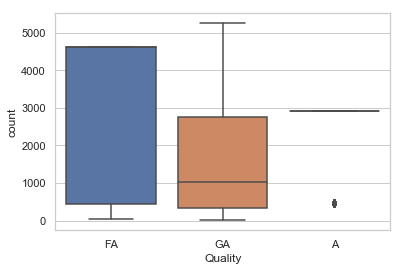

In [136]:
sb.boxplot( y='count', x='Quality', data=task3_good)

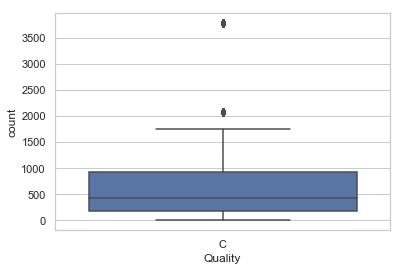

In [137]:
sb.boxplot(y='count', x='Quality', data=task3_bad)

# Discussion: 
* GA and C level articles is showing similar trend. most of the outliers are located from third quartile to the max. 
* interesting plot for A level articles. This could be due to the small number of articles for that category and most of the articles in that category have in avg 3000 talk-page posts. Which as I mentioned before supports my hypothesis.
* I have a question: Why haven't we categorize the GA level articles as not so good articles? Because it is been showing similar trends as for the C level articles 

# Task 4: Number of editors posting on talk-pages
## My Hypothesis: 
* I guess NSG articles might have less number of editors posting on talk-pages. Because mostly people who care about the quality of the certain kind of article would share some thoughts in the talk-page. What I mean is that when people are working collaborately to improve the article they usually get good article, the more the number the better quality 

In [138]:
task4_good = talk_good.groupby(["Article"])["user"].nunique().reset_index(name="count")
task4_good = pd.merge(task4_good, talk_good[['Article', 'Quality']], on='Article')
task4_good.drop_duplicates()

,Article,count,Quality
0,4chan,1426,FA
4615,AACS_encryption_key_controversy,202,GA
5656,AVG_PC_TuneUp,21,GA
5723,Acid2,129,FA
6097,Alan_Kotok,24,GA
6163,Alan_Turing,377,GA
7261,Allocator_(C++),6,GA
7280,Anonymous_(group),978,A
10198,Apple_Inc._litigation,49,GA
10309,Apple_TV,143,GA


In [139]:
task4_bad = talk_bad.groupby(["Article"])["user"].nunique().reset_index(name="count")
task4_bad = pd.merge(task4_bad, talk_bad[['Article', 'Quality']], on='Article')
task4_bad.drop_duplicates()

,Article,count,Quality
0,2016_Dyn_cyberattack,18,C
30,3dfx_Interactive,62,C
201,64-bit_computing,95,C
486,ACM_SIGHPC,1,C
487,ACM_SIGOPS,1,C
488,ARM_big.LITTLE,23,C
621,ARPANET,81,C
835,ASCII,176,C
1271,Aakash_(tablet),44,C
1378,Ada_(programming_language),90,C


Those description tables somehow proves my hypothesis which the higher the number the better the quality. Although there is not that much difference, it is still high enough

In [140]:
task4_good.describe()

,count
count,48686.000000
mean,512.924414
std,475.773539
min,5.000000
25%,106.000000
50%,305.000000
75%,868.000000
max,1426.000000


In [141]:
task4_bad.describe()

,count
count,52130.000000
mean,322.628410
std,421.054767
min,0.000000
25%,81.000000
50%,174.000000
75%,342.000000
max,1657.000000


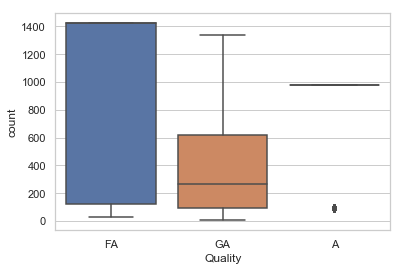

In [142]:
sb.boxplot( y='count', x='Quality', data=task4_good)

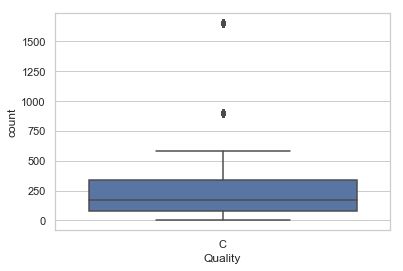

In [143]:
sb.boxplot( y='count', x='Quality', data=task4_bad)

## Discussion: 
* A level articles have on avg about 1000 unique editors on talk-page. This is pretty high number. 
* The mean for GA and C level articles are  close. Also the distribution of the outliers are similar. 
* Another interesting observation form the NSG boxplot, C level articles outliers. there are some extreme outliers for that category. Those articles have really huge number of editors on talk-page posts. 

# Task 5: Frequency of edits (time between edits)
## My Hypothesis: 
* the lower the frequency the lower the quality. Because before making any revision for existing articles, contributors mostly do some reasearch to justify their finding/agruments. So, that process would take some time.
* I assume that good articles would have changed not as frequent as NSG Articles

## The majority of the contribution for this part of the assigment is credited to Grayson (Wen Gwangxue). Thank you:) 

In [144]:
sc_good.head()

,Article,Quality,rev_id,page_id,user,timestamp,article_type
0,Parallel_computing,FA,866078418.0,145162.0,The Transhumanist,2018-10-28T03:13:28Z,Good
1,Parallel_computing,FA,863397642.0,145162.0,Dijonkitchen,2018-10-10T14:50:14Z,Good
2,Parallel_computing,FA,863196345.0,145162.0,ClueBot NG,2018-10-09T09:02:23Z,Good
3,Parallel_computing,FA,863196339.0,145162.0,49.147.207.78,2018-10-09T09:02:16Z,Good
4,Parallel_computing,FA,858091786.0,145162.0,InternetArchiveBot,2018-09-05T00:38:29Z,Good


In [145]:
sc_bad = sc_bad.dropna()

In [146]:
sc_bad.head()

,Article,Quality,rev_id,page_id,user,timestamp,article_type
235138,ACM_SIGHPC,C,857280826.0,54238206.0,Ozaab,2018-08-30T18:34:29Z,NotSoGood
235139,ACM_SIGHPC,C,857279400.0,54238206.0,Ozaab,2018-08-30T18:22:53Z,NotSoGood
235140,ACM_SIGHPC,C,857279055.0,54238206.0,Ozaab,2018-08-30T18:20:16Z,NotSoGood
235141,ACM_SIGHPC,C,857277948.0,54238206.0,Ozaab,2018-08-30T18:11:51Z,NotSoGood
235142,ACM_SIGHPC,C,856961666.0,54238206.0,Ozaab,2018-08-28T17:06:48Z,NotSoGood


In [147]:
task5_good = pd.DataFrame(sc_good.groupby('Article').agg('timestamp').unique())

This function helps to create the dataframe for articles and the mean frequency of edits. 
we converted the feature timestamp to the actual timestamp.
After that, calculate the difference between edits for an article and get the mean of those measurements. 

In [148]:
def measure_freq(article_name):
    tt = task5_good.loc[article_name]
    tt.loc['timestamp']
    task5 = pd.Series([pd.Timestamp(i) for i in tt.loc['timestamp']])
    task5 = task5.sort_values()
    return task5.diff().astype('timedelta64[s]').mean()

In [149]:
task5_new = pd.DataFrame([{"Article": row.name, 'N': measure_freq(row.name)} for index, row  in task5_good.iterrows()])
task5_new

,Article,N
0,4chan,7.026510e+04
1,AACS_encryption_key_controversy,3.786917e+05
2,AVG_PC_TuneUp,7.870546e+05
3,Acid2,3.119143e+05
4,Alan_Kotok,3.747858e+05
5,Alan_Turing,7.394235e+04
6,Allocator_(C++),2.363953e+06
7,Anonymous_(group),9.145795e+04
8,Apple_Inc._litigation,3.801047e+05
9,Apple_TV,1.202174e+05


In [150]:
task5_new.describe()

,N
count,1.520000e+02
mean,8.211359e+05
std,8.599846e+05
min,2.551303e+04
25%,1.852860e+05
50%,4.824696e+05
75%,1.182416e+06
max,3.992755e+06


In [151]:
task5_new.count()

Article    152
N          152
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23c34518>]],
      dtype=object)

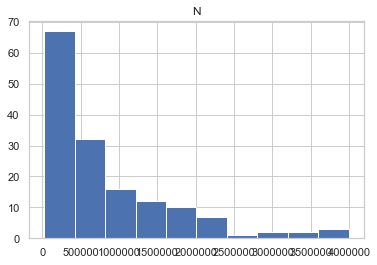

In [152]:
task5_new.hist(column='N')

In [153]:
task5_bad = pd.DataFrame(sc_bad.groupby('Article').agg('timestamp').unique())
def measure_freq(article_name):
    tt = task5_bad.loc[article_name]
    tt.loc['timestamp']
    task5 = pd.Series([pd.Timestamp(i) for i in tt.loc['timestamp']])
    task5 = task5.sort_values()
    return task5.diff().astype('timedelta64[s]').mean()
task5_new_bad = pd.DataFrame([{"Article": row.name, 'N': measure_freq(row.name)} for index, row  in task5_bad.iterrows()])
task5_new_bad.head()

,Article,N
0,2016_Dyn_cyberattack,1.464626e+05
1,3dfx_Interactive,5.542996e+05
2,64-bit_computing,2.622620e+05
3,ACM_SIGHPC,1.111019e+06
4,ACM_SIGOPS,2.302102e+06


In [154]:
task5_new_bad.count()

Article    250
N          250
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17965208>]],
      dtype=object)

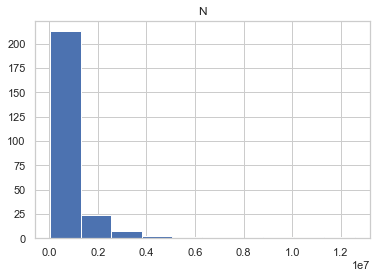

In [155]:
task5_new_bad.hist(column='N')

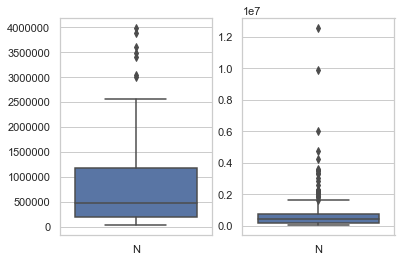

In [156]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task5_new,   ax=axes[0])
sb.boxplot( data=task5_new_bad,  ax=axes[1])

# Discussion: 
* As we expect good articles have higher frequency whereas the NSG articles have really low frequency. 
* most of the articles in the NSG category are edited/created by bots. 
* and we have noticed that whenever the user made edit, it would quickly be edited by a bot in milliseconds